In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc,rcParams
rc('xtick', labelsize=14) 
rc('ytick', labelsize=14)
rc('font',**{'family':'serif','serif':['cmr10']})
# rcParams['mathtext.fontset'] = 'stix'
# rcParams['font.family'] = 'STIXGeneral'
rc('text', usetex=True)
%matplotlib inline
from datetime import datetime
import sys
sys.path.append("/Users/andyreagan/work/2015/08-kitchentabletools/")
from dog.toys import *
import numpy as np

In [2]:
from matplotlib import patches

RdYlBu = np.genfromtxt("/Users/andyreagan/work/2014/11-foamLab-julia/RdYlBu.csv",delimiter=",")
def cmapper(cmap,val):
    return cmap[min(max(round(val*255),1),255)-1,:]

lookup_table = np.zeros([40000,4],dtype=np.int)
lookup_table[0:19999,:] = np.repeat([[0,1,3,2]],19999,axis=0)
# bottom right
lookup_table[19999:30000,:] = np.repeat([[0,1,2,3]],10001,axis=0)
# flip every 40th
lookup_table[19999:29999:40,:] = np.repeat([[0,1,3,2]],250,axis=0)
lookup_table[30000:40000,:] = np.repeat([[0,1,3,2]],10000,axis=0)
lookup_table[39,:] = [0,1,2,3]
lookup_table[39960:40000,:] = np.repeat([[0,1,2,3]],40,axis=0)
lookup_table[29960:29999,:] = np.repeat([[0,1,3,2]],39,axis=0)
def cell_point_order(cellID):
    # a lookup for how to reorder the point
    return lookup_table[cellID,:]

pts_x = np.genfromtxt("/Users/andyreagan/work/2014/11-foamLab-julia/cell_points_x.csv",delimiter=",")
pts_y = np.genfromtxt("/Users/andyreagan/work/2014/11-foamLab-julia/cell_points_y.csv",delimiter=",")

In [3]:
print(pts_x[0])
print(zip(pts_x[0],pts_y[0]))
a = np.array(zip(pts_x[0],pts_y[0]))
print(cell_point_order(0))
print(a[cell_point_order(0)])

[-0.37424261 -0.37425    -0.3749926  -0.375     ]
[(-0.37424261180000001, 0.0023514664050000001), (-0.37425000000000003, 0.0), (-0.37499259689999997, 0.0023561787320000001), (-0.375, 0.0)]
[0 1 3 2]
[[-0.37424261  0.00235147]
 [-0.37425     0.        ]
 [-0.375       0.        ]
 [-0.3749926   0.00235618]]


In [4]:
def plot_loop_whole_save(T,fname):
    # plot the normalized temp T
    # around the whole loop
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_axes([0.2,0.2,0.7,0.7])
    for cellID in range(40000):
        pts = np.array(zip(pts_x[cellID],pts_y[cellID]))
        # println(pts)
        p = patches.Polygon(pts[cell_point_order(cellID)],closed=True,edgecolor="none",facecolor=cmapper(RdYlBu,T[cellID]),rasterized=True)
        ax.add_patch(p)
    ax.set_xlim(np.array([-1,1])*0.38)
    ax.set_ylim(np.array([-1,1])*0.38)
    # optionally save it to PDF:
    # mysavefig(fname)
    plt.savefig(fname,bbox_inches="tight",dpi=600)

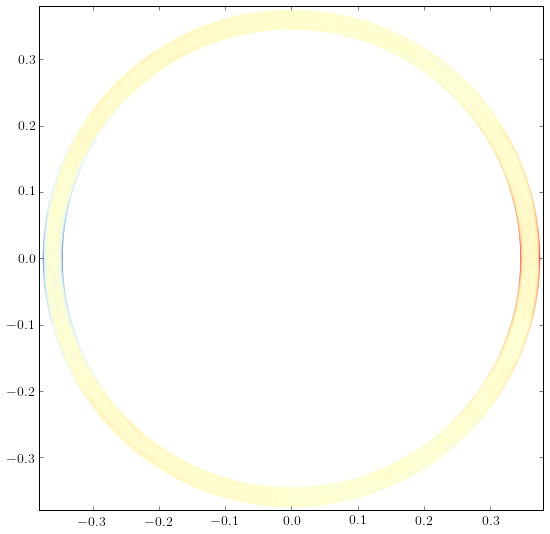

In [6]:
mode = np.genfromtxt("DMD-mode-2.csv")
plot_loop_whole_save(mode,"DMD-mode-02-python-test.png")
# plt.close()

In [ ]:
mode = np.genfromtxt("DMD-mode-21.csv")
plot_loop_whole_save(mode,"DMD-mode-21-python-test.png")

In [ ]:
mode = np.genfromtxt("DMD-mode-79.csv")
plot_loop_whole_save(mode,"DMD-mode-79-python-test.png")

In [7]:
# plot_loop_whole_save(mode,"DMD-mode-02-python-test.pdf")

(-0.1, 0.1)

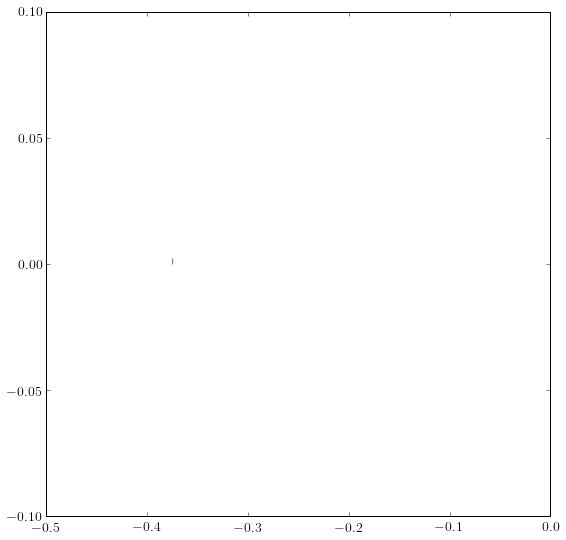

In [8]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0.2,0.2,0.7,0.7])
pts = np.array(zip(pts_x[0],pts_y[0]))
p = patches.Polygon(pts[cell_point_order(0)],closed=True,edgecolor="none",facecolor=cmapper(RdYlBu,mode[0])) #,rasterized=True)
ax.add_patch(p)
ax.set_xlim([-.5,0])
ax.set_ylim([-.1,.1])

In [9]:
mode[0]

1.0

In [10]:
cmapper(RdYlBu,mode[0])

array([ 0.19523261,  0.22145329,  0.58908115,  1.        ])

In [11]:
pts[cell_point_order(0)].shape

(4, 2)

(-0.38, 0.38)

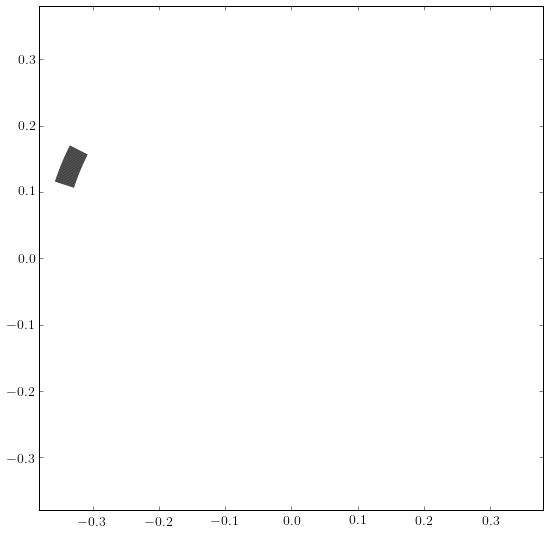

In [12]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0.2,0.2,0.7,0.7])
for cellID in range(2000,3000):
    pts = np.array(zip(pts_x[cellID],pts_y[cellID]))
    # println(pts)
    p = patches.Polygon(pts[cell_point_order(cellID)],closed=True,edgecolor="none",facecolor="black",rasterized=True)
    ax.add_patch(p)
ax.set_xlim([-.38,.38])
ax.set_ylim([-.38,.38])

In [13]:
print(pts_x)

[[-0.37424261 -0.37425    -0.3749926  -0.375     ]
 [-0.37349263 -0.3735     -0.37424261 -0.37425   ]
 [-0.37274264 -0.37275    -0.37349263 -0.3735    ]
 ..., 
 [ 0.          0.00234675  0.00234204  0.        ]
 [ 0.          0.00235147  0.00234675  0.        ]
 [ 0.00235147  0.00235618  0.          0.        ]]
